In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Random generator of size 1000
rng = np.random.default_rng(1)
x = rng.normal(0, np.pi, 1000)

# Select every 2 steps from the random list starting from second element
x11 = x[1::2].reshape((-1,1))
# Second feature position y (sine function)
x12 = np.sin(x11).reshape((-1,1))**2 - .5
# Assign label 0
y1 = np.zeros(shape=x11.shape).reshape((-1, 1))

# Select every 2 steps from the random list starting from first element
x21 = x[0::2].reshape((-1, 1))
# Second feature position y (cosine function)
x22 = np.cos(x21).reshape((-1,1))**2 + .5
# Assign label 1
y2 = np.ones(shape=x21.shape).reshape((-1, 1))

In [13]:
# Concatenate x and y coordinates for label 0 (x1) and  label 1 (x2)
x1 = np.concat([x11,x12], axis=1).reshape(-1,2)
x2 = np.concat([x21,x22], axis=1).reshape(-1,2)

# Concatenate features
features = np.concat([x1, x2], axis=0)
labels = np.concat([y1, y2], axis=0)

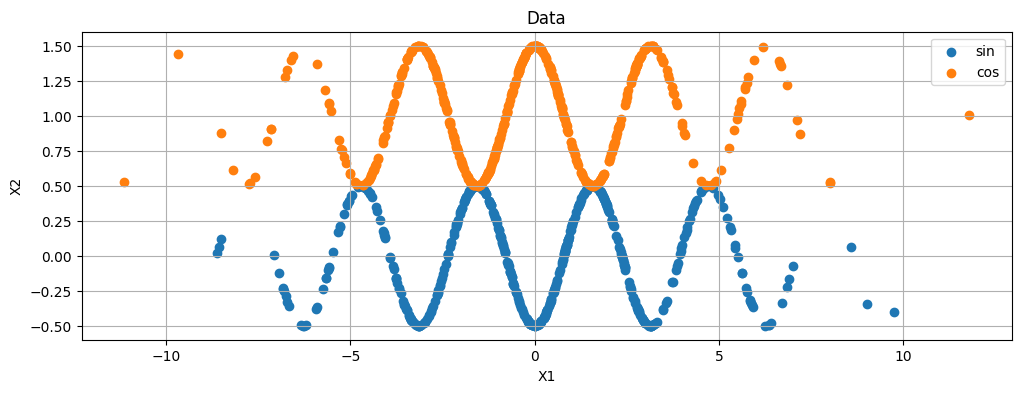

In [26]:
# Plot data
plt.figure(figsize=(12,4))
plt.scatter(features[:500,0], features[:500,1])
plt.scatter(features[500:,0], features[500:,1])
plt.legend(["sin", "cos"])
plt.gca().set_xlabel("X1")
plt.gca().set_ylabel("X2")
plt.title("Data")
plt.grid()

In [15]:
# Shuffle data
data = np.concat([features, labels], axis=1).T
rng.shuffle(data, axis=1)

In [16]:
# Split features and labels
X = data[:2]
Y = data[2].reshape(1,-1)
print("First 5 features:")
print(X[:, :5])

print("First 5 labels:")
print(Y[:, :5])

First 5 features:
[[ 6.83484246 -1.11316191  2.6367041   0.10367288  0.55343852]
 [-0.22531995  0.69521125  1.26602473 -0.48929038 -0.22372829]]
First 5 labels:
[[0. 1. 1. 0. 0.]]


In [17]:
# Split train and test
train_prop = 0.9
test_prop = 1 - train_prop

train_size = int(np.floor(X.shape[1]*train_prop))
test_size = int(X.shape[1] - train_size)

X_train = X[:, :train_size]
Y_train = Y[:, :train_size]

X_test = X[:, train_size:]
Y_test = Y[:, train_size:]

print("Train size:", train_size)
print("X train:\n", X_train[:, :5], end="\n"*2)
print("Y train:\n", Y_train[:, :5], end="\n"*2)

print("Test size:", test_size)
print("X test:\n", X_test[:, :5], end="\n"*2)
print("Y test:\n", Y_test[:, :5], end="\n"*2)

Train size: 900
X train:
 [[ 6.83484246 -1.11316191  2.6367041   0.10367288  0.55343852]
 [-0.22531995  0.69521125  1.26602473 -0.48929038 -0.22372829]]

Y train:
 [[0. 1. 1. 0. 0.]]

Test size: 100
X test:
 [[-3.35300372 -1.35092793 -3.04476723 -2.26076849 -2.29284444]
 [-0.45596728  0.54756813  1.4906541   0.09484774  0.06318069]]

Y test:
 [[0. 1. 1. 0. 0.]]



In [18]:
def initialize_weights(n_x: int) -> np.ndarray:
    """Intialize random weights."""
    W = rng.random(size=(n_x, 1))
    b = np.zeros(shape=(1, 1))
    return W, b

In [19]:
def sigmoid(Z: np.ndarray) -> np.ndarray:
    """Aplies sigmoid function to a numpy ndarray."""
    if Z.shape[0] != 1:
        msg_error = "Z must be a column vector"
        raise TypeError(msg_error)
    return 1/(1+np.exp(-Z))

In [20]:
def forward(
    W: np.ndarray,
    b: np.ndarray,
    X: np.ndarray,
) -> np.ndarray:
    """Compute forward pass."""
    Z = np.dot(W.T, X) + b
    A = sigmoid(Z)

    return Z, A

In [21]:
def compute_losses(
    Y: np.ndarray,
    Y_hat: np.ndarray,
) -> np.ndarray:
    """Compute the loss of every prediction."""
    losses = -((Y*np.log(Y_hat)) + ((1-Y)*np.log(1-Y_hat)))
    cost = np.squeeze(np.mean(losses, axis=1))
    return losses, cost

In [22]:
lr = 0.01
W, b = initialize_weights(X_train.shape[0])
costs = []
for i in range(20000+1):
    Z, A = forward(W, b, X_train)
    losses, cost = compute_losses(Y_train, A)
    dZ = A-Y_train
    dW = (1/train_size) * np.dot(X_train, dZ.T)
    db = (1/train_size) * np.sum(dZ)
    W = W - (lr*dW)
    b = b - (lr*db)
    costs.append(cost)
    if i % 1000 == 0:
        print(f"Epoch {i}: ",cost)

Epoch 0:  0.801430427083463
Epoch 1000:  0.38281601126012826
Epoch 2000:  0.3100642352501053
Epoch 3000:  0.2726367930427555
Epoch 4000:  0.24948595334446869
Epoch 5000:  0.23350538889395178
Epoch 6000:  0.22165904102238154
Epoch 7000:  0.21243089753189912
Epoch 8000:  0.2049766776231718
Epoch 9000:  0.1987869149876
Epoch 10000:  0.19353473236837918
Epoch 11000:  0.18900001027987218
Epoch 12000:  0.1850286123094966
Epoch 13000:  0.1815090718781078
Epoch 14000:  0.1783585732404178
Epoch 15000:  0.17551415841966583
Epoch 16000:  0.17292701115394968
Epoch 17000:  0.17055862515891454
Epoch 18000:  0.16837816608689624
Epoch 19000:  0.16636061234464086
Epoch 20000:  0.16448541746625733


Text(0.5, 1.0, 'Loss steps')

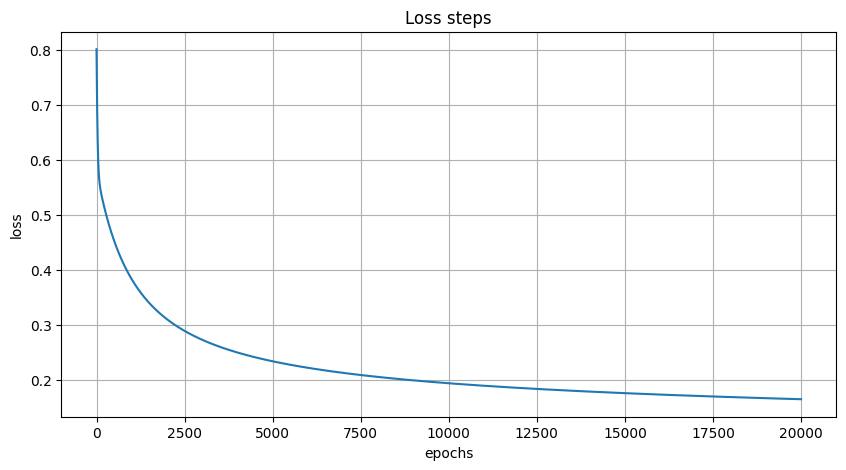

In [23]:
plt.figure(figsize=(10,5))
plt.plot(costs)
plt.grid(True)
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Loss steps")

In [24]:
Z, A = forward(W, b, X_test)
losses, cost = compute_losses(Y_test, A)
Y_hat = (A > 0.5).astype(int)
Y_hat

array([[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]])

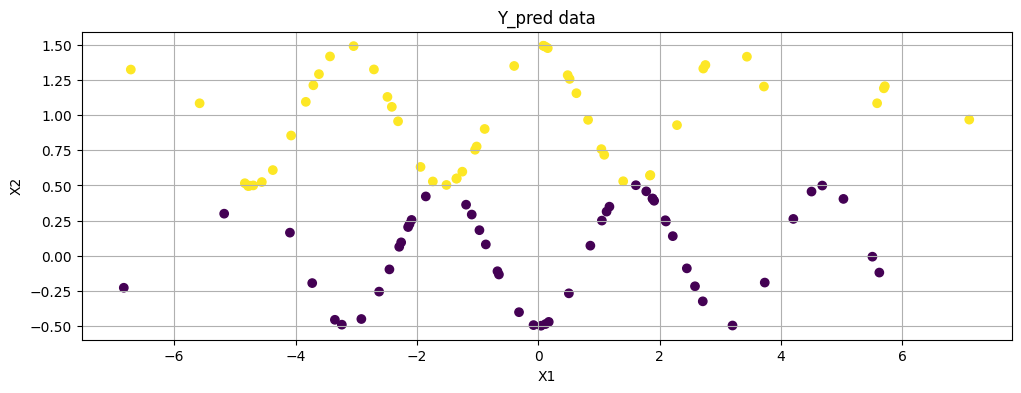

In [25]:
# Plot data
plt.figure(figsize=(12,4))
plt.scatter(X_test[0], X_test[1], c=np.squeeze(Y_hat))
plt.gca().set_xlabel("X1")
plt.gca().set_ylabel("X2")
plt.title("Y_pred data")
plt.grid()

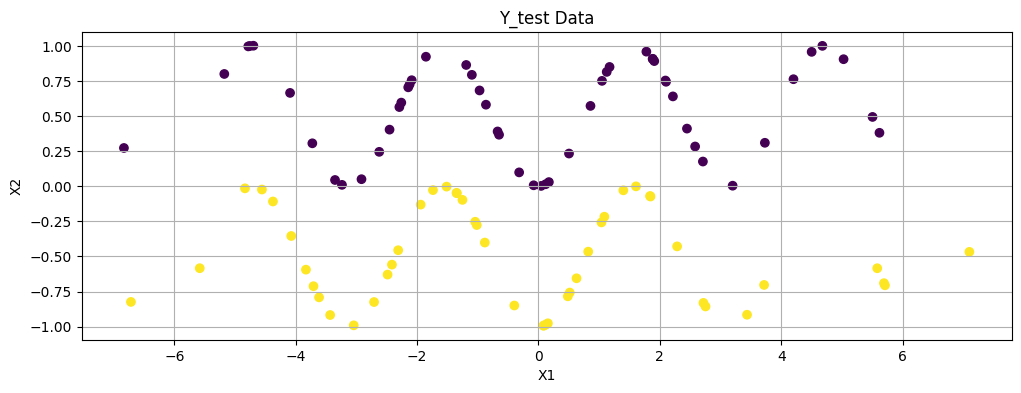

In [348]:
# Plot data
plt.figure(figsize=(12,4))
plt.scatter(X_test[0], X_test[1], c=np.squeeze(Y_test))
plt.gca().set_xlabel("X1")
plt.gca().set_ylabel("X2")
plt.title("Y_test Data")
plt.grid()